In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 85.1 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=d84bb6d2aba07f997edbc6bac01bdded9400f5eb2fc6cd4d5b9295bca375324f
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.5 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=6614722cf88b28235f08c44b55fb6af0bd9547a79a62097bb0ac35a6e145a589
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=f6b8422c6ae6ffe1a220f29e7ef487b26ed16a6fbb6370

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [5]:
book = "Messi_ The Inside story of the Boy Who Became a Legend ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Lionel_Messi"
titlename = "Lionel_Messi"

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [8]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

40
1/chapter_1


2023-04-09 13:57:51,912 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11
1/chapter_12
1/chapter_13
1/chapter_14
1/chapter_15
1/chapter_16
1/chapter_17
1/chapter_18
1/chapter_19
1/chapter_20
1/chapter_21
1/chapter_22
1/chapter_23
1/chapter_24
1/chapter_25
1/chapter_26
1/chapter_27
1/chapter_28
1/chapter_29
1/chapter_30
1/chapter_31
1/chapter_32
1/chapter_33
1/chapter_34
1/chapter_35
1/chapter_36
1/chapter_37
1/chapter_38
1/chapter_39
1/chapter_40


In [9]:
mp_bert

{'1/chapter_1': [('recipes', 0.4299),
  ('cook', 0.4162),
  ('beef', 0.4074),
  ('side dish', 0.3928),
  ('dishes', 0.3842)],
 '1/chapter_2': [('rosario hospital complex', 0.571),
  ('garibaldi hospital', 0.5585),
  ('operation rosario', 0.4767),
  ('rosario', 0.4126),
  ('giuseppe garibaldi', 0.4046)],
 '1/chapter_3': [('houses', 0.4049),
  ('neighbourhood', 0.3925),
  ('grandoli ground', 0.3843),
  ('building', 0.3708),
  ('fence', 0.348)],
 '1/chapter_4': [('leo', 0.5056),
  ('cintia', 0.3112),
  ('child', 0.2969),
  ('cintia arellano', 0.281),
  ('womb sisters', 0.274)],
 '1/chapter_5': [('fútbol malvinas newell', 0.5292),
  ('madrid captain', 0.5006),
  ('club atlético newell', 0.5),
  ('messi', 0.5),
  ('messi brother', 0.4915)],
 '1/chapter_6': [('maradona', 0.4498),
  ('adrián coria', 0.44),
  ('leandro depetris', 0.4186),
  ('messi', 0.3456),
  ('leo', 0.3376)],
 '1/chapter_7': [('footballer', 0.4491),
  ('doctor diego schwarsztein', 0.4271),
  ('diagnosis', 0.3506),
  ('statu

In [10]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
13
15
15
15
15
15
14
15
15
14
15
15
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
15
15
15


In [12]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'tenth league', 'inelegant collisions', 'left footed', 'pitch messi', 'Holland World Cup', 'Messi surpass Maradona', 'grandmother', 'finishes', 'professional contract', 'bilardo', 'Santiago Segurola', 'doctor diego schwarsztein', 'point of view', 'children team', 'unwritten rules', 'Cintia', 'madrid', 'semi finals', 'infant school', 'favourite player', 'rosario clubs', 'growth hormone treatment', 'surprised', 'Champions League final', 'cleaning lady', 'international tournament', 'boy', 'Nou Camp', 'stature', 'international airport', 'football tactically', 'messi provisional licence', 'argentine', 'World Cup Player', 'footballer', 'disbelieving expressions', 'disappointment', 'jorge messi', 'youth', 'direction surprising', 'central defenders', 'level performance', 'madrid captain', 'world cup score sheet', 'cardboard advertising', 'Álex García', 'triangular tournaments', 'multinational company', 'spanish', 'starting', 'extremely respectful', 'hormone treatment', 'cesc fàbregas', 'goal 

In [13]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Nice_And_Golden-Brown_1889': ['1/chapter_1'], 'Passion_1889': ['1/chapter_1'], 'Football_School_1889': ['1/chapter_1'], 'Cook_1889': ['1/chapter_1'], 'Side_Dish_1889': ['1/chapter_1'], 'Leo_2005': ['1/chapter_4', '1/chapter_8', '1/chapter_17'], 'Leo_1994': ['1/chapter_6'], 'Leo_1993': ['1/chapter_31'], 'Rosario_1987': ['1/chapter_2'], 'Rosario_2005': ['1/chapter_8'], 'N’T_1889': ['1/chapter_1'], 'N’T_1986': ['1/chapter_3'], 'N’T_2005': ['1/chapter_4', '1/chapter_8', '1/chapter_16', '1/chapter_17', '1/chapter_21', '1/chapter_22'], 'N’T_1994': ['1/chapter_6'], 'N’T_2000': ['1/chapter_10'], 'N’T_1990': ['1/chapter_12'], 'N’T_2006': ['1/chapter_24'], 'N’T_2003': ['1/chapter_28'], 'N’T_1993': ['1/chapter_30', '1/chapter_31'], 'N’T_2007': ['1/chapter_33'], 'Beef_1889': ['1/chapter_1'], 'Napolitana_Schnitzel_1889': ['1/chapter_1'], 'Celia_1889': ['1/chapter_1'], 'Alfajores_Traditional_1889': ['1/chapter_1'], 'Dishes_1889': ['1/chapter_1'], 'Kids_1889': ['1/chapte

In [14]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [15]:
key_yr_chap_mp

defaultdict(list,
            {'Nice_And_Golden-Brown_1889': ['1/chapter_1'],
             'Passion_1889': ['1/chapter_1'],
             'Football_School_1889': ['1/chapter_1'],
             'Cook_1889': ['1/chapter_1'],
             'Side_Dish_1889': ['1/chapter_1'],
             'Leo_2005': ['1/chapter_4', '1/chapter_8', '1/chapter_17'],
             'Leo_1994': ['1/chapter_6'],
             'Leo_1993': ['1/chapter_31'],
             'Rosario_1987': ['1/chapter_2'],
             'Rosario_2005': ['1/chapter_8'],
             'N’T_1889': ['1/chapter_1'],
             'N’T_1986': ['1/chapter_3'],
             'N’T_2005': ['1/chapter_4',
              '1/chapter_8',
              '1/chapter_16',
              '1/chapter_17',
              '1/chapter_21',
              '1/chapter_22'],
             'N’T_1994': ['1/chapter_6'],
             'N’T_2000': ['1/chapter_10'],
             'N’T_1990': ['1/chapter_12'],
             'N’T_2006': ['1/chapter_24'],
             'N’T_2003': ['1/chapte

In [16]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Nice_And_Golden-Brown_1889
Passion_1889
Football_School_1889
Cook_1889
Side_Dish_1889
Leo_2005
Leo_1994
Leo_1993
Rosario_1987
Rosario_2005
N’T_1889
N’T_1986
N’T_2005
N’T_1994
N’T_2000
N’T_1990
N’T_2006
N’T_2003
N’T_1993
N’T_2007
Beef_1889
Napolitana_Schnitzel_1889
Celia_1889
Alfajores_Traditional_1889
Dishes_1889
Kids_1889
Recipes_1889
Hospital_1987
Progressive_Impoverishment_1987
Country_History_1987
Buenos_Aires_1993
Garibaldi_Hospital_1987
Jorge_1987
Giuseppe_Garibaldi_1987
Nineteenth_Century_1987
Operation_Rosario_1987
Military_Junta_1987
Cleaning_Lady_1987
Rosario_Hospital_Complex_1987
Aparicio_1986
Messi_1994
Messi_2000
Messi_2003
Messi_2005
Messi_1978
Messi_2006
Messi_2007
Messi_1993
Messi_2009
Messi_1986
Messi_2010
Messi_2008
Scored_1986
Summer_Afternoon_1986
Incredible_Concentration_1986
Grandoli_Ground_1986
Building_1986
Houses_1986
Neighbourhood_1986
Grandmother_1986
Señor_Aparicio_1986
Cardboard_Advertising_1986
Fence_1986
Cintia_2005
Cintia_Arellano_2005
Firecrackers_Playi

In [17]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [18]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Club_career', 'Barcelona', '2003–2005:_Rise_to_the_first_team', '2005–2008:_Becoming_a_starting_eleven_player', '2008–09:_First_treble', "2009–10:_First_Ballon_d'Or", '2010–2011:_Fifth_La_Liga_title_and_third_Champions_League', '2012:_A_record-breaking_year', '2013–2014:_Messidependencia', '2014–15:_Second_treble', '2015–16:_Domestic_success', '2016–17:_Fourth_Golden_Boot', '2017–18:_Domestic_double_and_a_record_fifth_Golden_Boot', '2018–19:_Captaincy,_10th_La_Liga_title,_and_a_record_sixth_Golden_Boot', "2019–20:_Record_sixth_Ballon_d'Or", 'August_2020:_Desire_to_leave_Barcelona', '2020–21:_Final_season_at_Barcelona', 'Paris_Saint-Germain', '2021–22:_First_season_adjustments', '2022–23:_Regaining_form', 'International_career', '2004–2005:_Success_at_youth_level', '2005–2006:_Senior_and_World_Cup_debuts', '2007–2008:_Copa_América_final_and_Olympic_gold', '2008–2011:_Collective_decline', '2011–2013:_Assuming_the_captaincy', '2014–2015:_World_Cup_and_Copa_América_finals',

In [19]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [20]:
mp_sim_score

{'Early_life->Football_School_1889': tensor(0.5634, device='cuda:0'),
 'Early_life->Side_Dish_1889': tensor(0.1164, device='cuda:0'),
 'Early_life->Leo_2005': tensor(0.6822, device='cuda:0'),
 'Early_life->Leo_1993': tensor(0.5125, device='cuda:0'),
 'Early_life->Rosario_1987': tensor(0.4804, device='cuda:0'),
 'Early_life->Rosario_2005': tensor(0.5904, device='cuda:0'),
 'Early_life->N’T_2005': tensor(0.0004, device='cuda:0'),
 'Early_life->Beef_1889': tensor(0.1630, device='cuda:0'),
 'Early_life->Napolitana_Schnitzel_1889': tensor(0.1164, device='cuda:0'),
 'Early_life->Celia_1889': tensor(0.4557, device='cuda:0'),
 'Early_life->Dishes_1889': tensor(0.0785, device='cuda:0'),
 'Early_life->Kids_1889': tensor(0.4375, device='cuda:0'),
 'Early_life->Hospital_1987': tensor(0.1123, device='cuda:0'),
 'Early_life->Buenos_Aires_1993': tensor(0.2551, device='cuda:0'),
 'Early_life->Garibaldi_Hospital_1987': tensor(0.2479, device='cuda:0'),
 'Early_life->Jorge_1987': tensor(0.6644, device='c

In [21]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [22]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [23]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [24]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

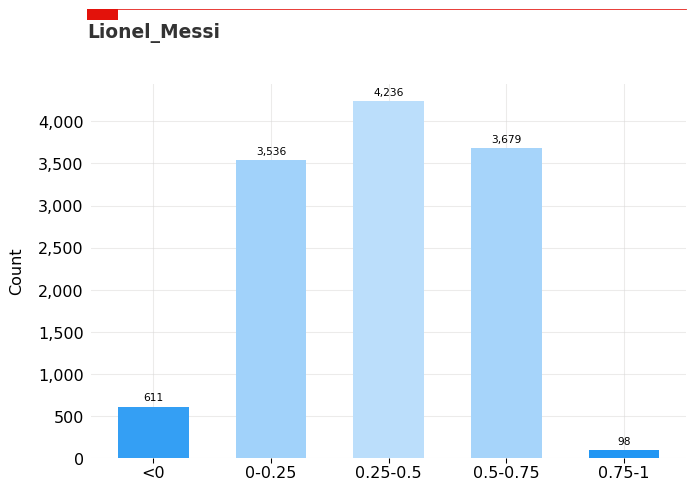

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [26]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life': 2001, 'Club_career': -1, 'Barcelona': -1, '2003–2005:_Rise_to_the_first_team': 2004, '2005–2008:_Becoming_a_starting_eleven_player': 2007, '2008–09:_First_treble': 2008, "2009–10:_First_Ballon_d'Or": 2009, '2010–2011:_Fifth_La_Liga_title_and_third_Champions_League': 2010, '2012:_A_record-breaking_year': 1992, '2013–2014:_Messidependencia': 2013, '2014–15:_Second_treble': 2014, '2015–16:_Domestic_success': 2015, '2016–17:_Fourth_Golden_Boot': 2016, '2017–18:_Domestic_double_and_a_record_fifth_Golden_Boot': 2018, '2018–19:_Captaincy,_10th_La_Liga_title,_and_a_record_sixth_Golden_Boot': 2017, "2019–20:_Record_sixth_Ballon_d'Or": 2019, 'August_2020:_Desire_to_leave_Barcelona': 2020, '2020–21:_Final_season_at_Barcelona': 2020, 'Paris_Saint-Germain': -1, '2021–22:_First_season_adjustments': 2021, '2022–23:_Regaining_form': 2005, 'International_career': -1, '2004–2005:_Success_at_youth_level': 2003, '2005–2006:_Senior_and_World_Cup_debuts': 2006, '2007–2008:_Copa_América_final_

In [27]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [28]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


265


In [29]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life   ->  227
2003–2005:_Rise_to_the_first_team   ->  216
2005–2008:_Becoming_a_starting_eleven_player   ->  214
2008–09:_First_treble   ->  207
2009–10:_First_Ballon_d'Or   ->  206
2010–2011:_Fifth_La_Liga_title_and_third_Champions_League   ->  204
2012:_A_record-breaking_year   ->  196
2013–2014:_Messidependencia   ->  201
2014–15:_Second_treble   ->  192
2015–16:_Domestic_success   ->  201
2016–17:_Fourth_Golden_Boot   ->  196
2017–18:_Domestic_double_and_a_record_fifth_Golden_Boot   ->  197
2018–19:_Captaincy,_10th_La_Liga_title,_and_a_record_sixth_Golden_Boot   ->  198
2019–20:_Record_sixth_Ballon_d'Or   ->  198
August_2020:_Desire_to_leave_Barcelona   ->  178
2020–21:_Final_season_at_Barcelona   ->  208
2021–22:_First_season_adjustments   ->  189
2022–23:_Regaining_form   ->  182
2004–2005:_Success_at_youth_level   ->  215
2005–2006:_Senior_and_World_Cup_debuts   ->  213
2007–2008:_Copa_América_final_and_Olympic_gold   ->  205
2008–2011:_Collective_decline   ->  208
2011–2

In [30]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [31]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life  ->   ['Leo_Messi_2000', 'Youth_Football_2000', 'Barcelona_Fc_2002', 'Barcelona_Experience_2002', 'Barcelona_Id_Badge_2002']
2003–2005:_Rise_to_the_first_team  ->   ['Outstanding_Goals_2005', 'Holland_World_Cup_2005', 'Team_Mates_2005', 'Players_2005', 'Team_1990']
2005–2008:_Becoming_a_starting_eleven_player  ->   ['Barcelona_Player_2007', 'Minute_Messi_2007', 'Leo_Messi_2007', 'Messi_Plays_Messiah’_2007', 'Milan_Player_2007']
2008–09:_First_treble  ->   ['Fc_Barcelona_2008', 'Barcelona_2008', 'Messi_2008', 'World_Cup_2008', 'World_Cup_Player_2008']
2009–10:_First_Ballon_d'Or  ->   ['Lionel_Messi_2009', 'Lionel_Andrés_Messi_2009', 'Jorge_Messi_2009', 'Messi_Barcelona_2009', 'Barça_2009']
2010–2011:_Fifth_La_Liga_title_and_third_Champions_League  ->   ['Luis_Suárez_2010', 'Barcelona_Coach_2010', 'Messi_2010', 'World_Cup_2010', 'World_Cup_Year_2010']
2012:_A_record-breaking_year  ->   ['Goal_Scorer_1993', 'Goal_1993', 'Messi_1993', 'Madrid_1993', 'Outstanding_Footballer_1993'

In [32]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [33]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [34]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [35]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Footballer', 'Messi', 'World Cup', 'Leo Messi Represent', 'Rosario', 'Barça', 'Ronaldinho', 'Central Defenders', 'Diego Maradona', 'National Team', 'Lionel Messi', 'Argentine Football', 'Quarter Finals', 'Cristiano Ronaldo', 'Pitch', 'Fifa World Player', 'Barça Team', 'Leo Messi', 'Champions League', 'Leo', 'Goal Scorer', 'Maradona', 'Team Mates']
23
{'Early_life': 0, '2003–2005:_Rise_to_the_first_team': 2, '2005–2008:_Becoming_a_starting_eleven_player': 1, '2008–09:_First_treble': 2, "2009–10:_First_Ballon_d'Or": 0, '2010–2011:_Fifth_La_Liga_title_and_third_Champions_League': 2, '2012:_A_record-breaking_year': 3, '2022–23:_Regaining_form': 1, '2004–2005:_Success_at_youth_level': 1, '2005–2006:_Senior_and_World_Cup_debuts': 1, '2007–2008:_Copa_América_final_and_Olympic_gold': 0, '2008–2011:_Collective_decline': 2, '2014–2015:_World_Cup_and_Copa_América_finals': 3, '2018:_World_Cup': 0, '2019–2020:_Copa_América_third-place,_suspension_and_Superclásico_victory': 0, 'Style_of_play': 1, 

In [36]:
print(sum(list(mp2.values())))

23


In [37]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life': set(), '2003–2005:_Rise_to_the_first_team': set(), '2005–2008:_Becoming_a_starting_eleven_player': set(), '2008–09:_First_treble': set(), "2009–10:_First_Ballon_d'Or": set(), '2010–2011:_Fifth_La_Liga_title_and_third_Champions_League': set(), '2012:_A_record-breaking_year': set(), '2022–23:_Regaining_form': set(), '2004–2005:_Success_at_youth_level': set(), '2005–2006:_Senior_and_World_Cup_debuts': set(), '2007–2008:_Copa_América_final_and_Olympic_gold': set(), '2008–2011:_Collective_decline': set(), '2014–2015:_World_Cup_and_Copa_América_finals': set(), '2018:_World_Cup': set(), '2019–2020:_Copa_América_third-place,_suspension_and_Superclásico_victory': set(), 'Style_of_play': set(), 'Reception_and_comparisons_to_Diego_Maradona': {'Ronaldinho'}, 'Comparisons_with_Cristiano_Ronaldo': set(), 'Family_and_relationships': set(), 'Honours': set()}
{'Early_life': 0, '2003–2005:_Rise_to_the_first_team': 0, '2005–2008:_Becoming_a_starting_eleven_player': 0, '2008–09:_First_trebl

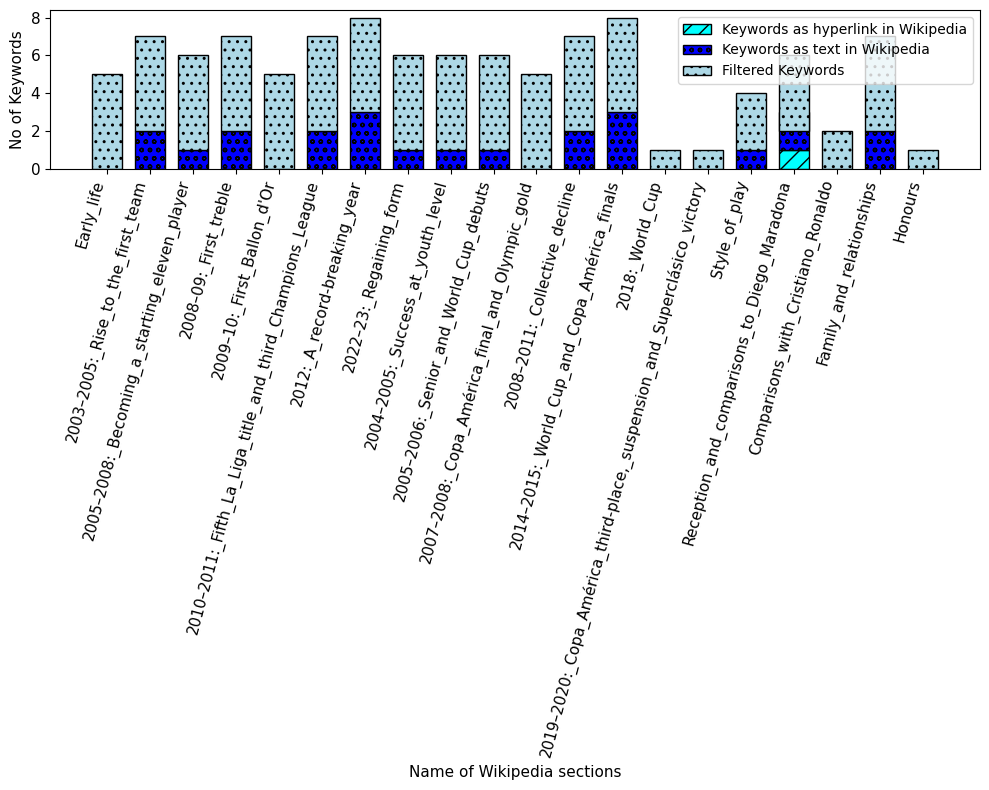

In [38]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [39]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Youth_Football', 'Play_Leo_Messi', 'Youth_Team', 'Barcelona', 'Barça', 'Barcelona_Experience', 'Argentine_Football', 'Messi_Swerves', 'Military_Junta', 'N’T_Play_Ball', 'Diego_Armando_Maradona', 'Team', 'Barcelona_Fc', 'Ronaldinho', 'Team_Mates', 'Thousands_Of_Clips', 'Fc_Barcelona', 'Jorge_Messi', 'World_Cup_Year', 'Messi_Plays_Messiah’', 'Goalie', 'Messi_Cuccittini', 'Left_Footed', 'Ball', 'Buenos_Aires', 'Messi_Barcelona', 'Outstanding_Goals', 'Holland_World_Cup', 'Argentine_Number', 'Footballing_Thought', 'Leo_Messi', 'Maradona', 'Dragão_Stadium', 'Goal', 'Lionel_Messi', 'Outstanding_Footballer', 'Scored', 'Ise_Messi', 'Midfield_Goal', 'Messi_Today', 'Luis_Suárez', 'Ronaldo', 'Diego_Maradona', 'Coco’_Basile', 'Players', 'Barcelona_Coach', 'Cristiano_Ronaldo', 'Lionel_Andrés_Messi', 'Minute_Leo_Messi', 'Time_Messi', 'World_Cup_Player', 'Goal_Scorer', 'Fc_Barcelona_Youth_Team', 'Condemned_To_Ridicule', 'Roberto_Perfumo', 'Messi', 'Cintia', 'World_Cup', 'Barcelona_Player', 'Milan_Pl

In [40]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

4384
{'Switzerland_national_football_team', 'Template:Onze_Mondial_European_Footballer_of_the_Year', 'Trofeo_EFE', 'The_Best_FIFA_Football_Awards_2022', 'Template:Globe_Soccer_Awards_best_Player', 'Ooredoo', 'Leandro_Cufr%C3%A9', '1957_Ballon_d%27Or', 'Predrag_Rajkovi%C4%87', 'Victorio_Unamuno', 'Rui_%C3%81guas_(footballer)', 'Gabriel_Mercado', 'UNFP_Player_of_the_Month', 'Template:Argentina_squad_2007_Copa_Am%C3%A9rica', 'Jos%C3%A9_Mar%C3%ADa_Medina_(footballer)', '1986%E2%80%9387_La_Liga', 'Hans_Krankl', 'CD_Legan%C3%A9s', 'Spain_national_football_team', 'Harry_Kane', 'Algeria', 'Template:Notable_people_from_Rosario', 'Category:Medalists_at_the_2008_Summer_Olympics', 'Template_talk:Trofeo_EFE', 'Jorge_Sampaoli', 'Litto_Nebbia', '1990%E2%80%9391_La_Liga', 'Juan_Imhoff', 'Tim_Vickery', 'AS_Saint-%C3%89tienne', 'Justo_Tejada', 'France_Football', 'Bj%C3%B6rn_Borg', 'Mark_O%27Meara', 'Horacio_Rodr%C3%ADguez_Larreta', 'Deportivo_Alav%C3%A9s', '2011_FIFA_Club_World_Cup_Final', 'Luis_Enrique

In [41]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Diego_Maradona', 'Ronaldinho', 'Cristiano_Ronaldo'}


3

In [42]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'World_Cup_Year_2010', 'Messi_1978', 'World_Cup_1986', 'Watching_Football_2003', 'Messi_Plays_Messiah’_2007', 'Messi_Cuccittini_2005', 'Messi_Today_2006', 'Ronaldinho_1978', 'Fc_Barcelona_2008', 'Messi_1993', 'Diego_Maradona_2007', 'Luis_Suárez_2010', 'Madrid_1993', 'Youth_Team_2003', 'Dragão_Stadium_2003', 'Minute_Leo_Messi_2005', 'Players_2005', 'Youth_Football_2000', 'Messi_2003', 'Diego_Armando_Maradona_2007', 'Messi_2005', 'Ball_1994', 'Condemned_To_Ridicule_1986', 'Midfield_Goal_1990', 'Milan_Player_2007', 'Lionel_Messi_2009', 'Barcelona_Player_2007', 'Barcelona_2008', 'Thousands_Of_Clips_2003', 'Barcelona_Experience_2002', 'Minute_Messi_2007', 'Messi_2008', 'Cristiano_Ronaldo_2007', 'Holland_World_Cup_2005', 'Leo_Messi_2000', 'Argentine_Number_1986', 'Scored_1986', 'Goal_Scorer_1993', 'Play_Leo_Messi_2005', 'Barcelona_Fc_2002', 'Goalie_1990', 'National_Team_1986', 'Ronaldo_1978', 'Leo_Messi_2007', 'Barcelona_Coach_2010', 'Maradona_2007', 'Messi_Barcelona_2009', 'Messi_2010', 'W

In [43]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Buenos_Aires_1993': ['1/chapter_31'], 'Military_Junta_1987': ['1/chapter_2'], 'Messi_2003': ['1/chapter_14', '1/chapter_19', '1/chapter_28'], 'Messi_2005': ['1/chapter_16', '1/chapter_18', '1/chapter_21'], 'Messi_1978': ['1/chapter_23'], 'Messi_2006': ['1/chapter_24'], 'Messi_1993': ['1/chapter_30'], 'Messi_1986': ['1/chapter_37'], 'Messi_2010': ['1/chapter_38', '1/chapter_39'], 'Messi_2008': ['1/chapter_40'], 'Scored_1986': ['1/chapter_3'], 'Cintia_2005': ['1/chapter_4'], 'Maradona_2006': ['1/chapter_24'], 'Maradona_2007': ['1/chapter_27'], 'Ball_1994': ['1/chapter_6'], 'N’T_Play_Ball_1994': ['1/chapter_6'], 'Hormone_Treatment_1998': ['1/chapter_7'], 'Hormone_Deficiency_1998': ['1/chapter_7'], 'Leo_Messi_2000': ['1/chapter_9'], 'Leo_Messi_2007': ['1/chapter_25', '1/chapter_32'], 'Lionel_Messi_2009': ['1/chapter_36'], 'Outstanding_Goals_2005': ['1/chapter_8'], 'Barcelona_2008': ['1/chapter_40'], 'Youth_Team_2003': ['1/chapter_13'], 'Youth_Football_2000': ['1/chapter_9'], 'Argentine_F

In [44]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['world cup year', 'messi', 'world cup', 'watching football', 'messi plays messiah’', 'messi cuccittini', 'messi today', 'ronaldinho', 'fc barcelona', 'messi', 'diego maradona', 'luis suárez', 'madrid', 'youth team', 'dragão stadium', 'minute leo messi', 'players', 'youth football', 'messi', 'diego armando maradona', 'messi', 'ball', 'condemned to ridicule', 'midfield goal', 'milan player', 'lionel messi', 'barcelona player', 'barcelona', 'thousands of clips', 'barcelona experience', 'minute messi', 'messi', 'cristiano ronaldo', 'holland world cup', 'leo messi', 'argentine number', 'scored', 'goal scorer', 'play leo messi', 'barcelona fc', 'goalie', 'national team', 'ronaldo', 'leo messi', 'barcelona coach', 'maradona', 'messi barcelona', 'messi', 'world cup', 'messi', 'military junta', 'maradona', 'argentine football', 'goal', 'hormone deficiency', 'barça', 'buenos aires', 'lionel andrés messi', 'time messi', 'cintia', 'barcelona id badge', 'footballing thought', 'world cup', 'world c

In [45]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

28
82
0.34146341463414637
